In [3]:
# 데이터 파일을 로드하여 내용을 확인합니다.
import pandas as pd

# CSV 파일을 읽어서 DataFrame으로 저장
music_df = pd.read_csv('C:/Users/Administrator/Music.csv')

# 처음 5개의 행을 출력하여 데이터의 구조를 확인
music_df.head()

,name,artist,spotify_id,preview,img,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,acousticness_artist,danceability_artist,energy_artist,instrumentalness_artist,liveness_artist,speechiness_artist,valence_artist
0,Mood (feat. iann dior),24kGoldn,3tjFYV6RSFtuktYl3ZtYcq,https://p.scdn.co/mp3-preview/45cb08fdb67744ab...,https://i.scdn.co/image/ab67616d0000b273ff8c98...,0.700,0.722,-3.558,0.0369,0.22100,0.000000,0.2720,0.756,0.118269,0.731588,0.681235,0.000002,0.160000,0.123765,0.566824
1,Blinding Lights,The Weeknd,0VjIjW4GlUZAMYd2vXMi3b,NaN,https://i.scdn.co/image/ab67616d0000b2738863bc...,0.514,0.730,-5.934,0.0598,0.00146,0.000095,0.0897,0.334,0.271439,0.574808,0.607873,0.010594,0.201728,0.086811,0.305189
2,Dynamite,BTS,0t1kP63rueHleOhQkYSXFY,https://p.scdn.co/mp3-preview/a707728846c105f4...,https://i.scdn.co/image/ab67616d0000b273755995...,0.746,0.765,-4.410,0.0993,0.01120,0.000000,0.0936,0.737,0.099350,0.614798,0.786452,0.000044,0.202608,0.128515,0.533369
3,ROCKSTAR (feat. Roddy Ricch),DaBaby,7ytR5pFWmSjzHJIeQkgog4,NaN,https://i.scdn.co/image/ab67616d0000b27320e08c...,0.746,0.690,-7.956,0.1640,0.24700,0.000000,0.1010,0.497,0.093113,0.829283,0.657626,0.000002,0.170425,0.284725,0.629374
4,For The Night (feat. Lil Baby & DaBaby),Pop Smoke,0PvFJmanyNQMseIFrU708S,NaN,https://i.scdn.co/image/ab67616d0000b27377ada0...,0.823,0.586,-6.606,0.2000,0.11400,0.000000,0.1930,0.347,0.191520,0.675143,0.702686,0.000194,0.247669,0.280103,0.490229


In [4]:
from sklearn.metrics.pairwise import cosine_similarity

# 사용할 음악 특성 선택 ('danceability', 'energy', 'valence')
selected_features = ['danceability', 'energy', 'valence']
df_features = music_df[selected_features]

# 데이터셋의 일부만 사용하여 코사인 유사도 계산
sample_df_features = df_features.sample(n=1000, random_state=1)

# 코사인 유사도 계산
cosine_sim_sample = cosine_similarity(sample_df_features, sample_df_features)

# 결과 확인
cosine_sim_sample[:5, :5]

array([[1.        , 0.93961113, 0.88337532, 0.96741382, 0.96072704],
       [0.93961113, 1.        , 0.98367542, 0.87526314, 0.99686791],
       [0.88337532, 0.98367542, 1.        , 0.84172575, 0.97706888],
       [0.96741382, 0.87526314, 0.84172575, 1.        , 0.91075646],
       [0.96072704, 0.99686791, 0.97706888, 0.91075646, 1.        ]])

In [5]:
# 첫 번째 음악에 대한 유사도를 가져옵니다.
sim_scores = list(enumerate(cosine_sim_sample[0]))

# 유사도에 따라 음악들을 정렬합니다.
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

# 가장 유사한 5개의 음악을 가져옵니다.
sim_scores = sim_scores[1:6]

# 가장 유사한 음악의 인덱스를 가져옵니다.
music_indices = [i[0] for i in sim_scores]

# 가장 유사한 음악의 정보를 출력합니다.
recommended_music = sample_df_features.iloc[music_indices]
recommended_music.reset_index(drop=True, inplace=True)
recommended_music

,danceability,energy,valence
0,0.222,0.681,0.388
1,0.281,0.967,0.555
2,0.375,0.964,0.582
3,0.231,0.776,0.513
4,0.353,0.866,0.544


In [6]:
# 샘플 데이터의 인덱스를 저장합니다.
sample_indices = sample_df_features.index.tolist()

# 추천된 음악의 원래 인덱스를 가져옵니다.
original_indices = [sample_indices[i] for i in music_indices]

# 원래 데이터셋에서 해당 인덱스의 'name', 'artist', 'img' 컬럼 정보를 가져옵니다.
recommended_music_info = music_df.loc[original_indices, ['name', 'artist', 'img']]
recommended_music_info.reset_index(drop=True, inplace=True)
recommended_music_info

,name,artist,img
0,Come Again,Damn Yankees,no
1,The Crowd,Operation Ivy,no
2,Everybodies Girl,Dwarves,no
3,Save You,Simple Plan,no
4,If You Wanna,The Vaccines,https://i.scdn.co/image/ab67616d0000b27373a8b8...


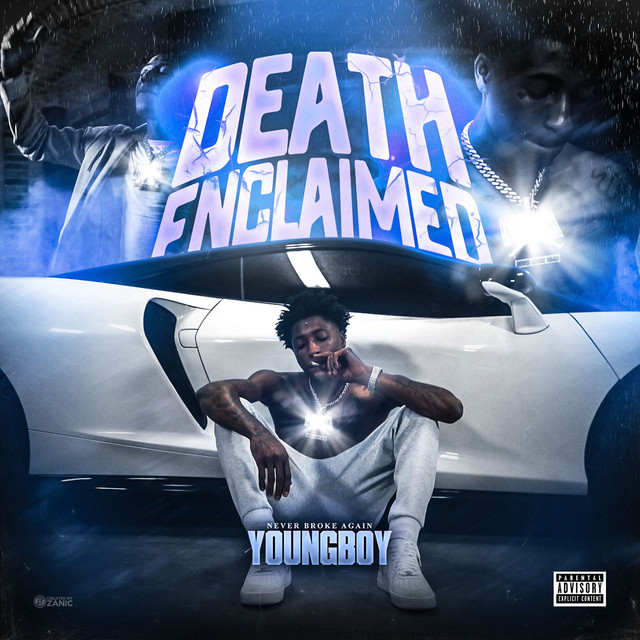

In [5]:
from PIL import Image
import IPython.display as display
from urllib.request import urlopen

# 이미지 URL이 있는지 확인합니다.
img_url = recommended_music_info.loc[1, 'img']

if img_url != 'no':
    # 이미지를 불러옵니다.
    img = Image.open(urlopen(img_url))
    # 이미지를 출력합니다.
    display.display(img)
else:
    print("이미지가 없습니다.")

In [6]:
from IPython.core.display import display, HTML

# 이미지와 텍스트를 함께 출력할 HTML 문자열을 생성합니다.
html_content = "<table>"

for index, row in recommended_music_info.iterrows():
    name = row['name']
    artist = row['artist']
    img = row['img'] if row['img'] != 'no' else 'https://via.placeholder.com/150'
    
    html_content += f"<tr>"
    html_content += f"<td><img src='{img}' width='150' height='150'></td>"
    html_content += f"<td><b>Name:</b> {name}<br><b>Artist:</b> {artist}</td>"
    html_content += f"</tr>"

html_content += "</table>"

# HTML 문자열을 출력합니다.
display(HTML(html_content))

,Name: I Still Believe (Great Design)Artist: The Call
,Name: Death EnclaimedArtist: YoungBoy Never Broke Again
,Name: Santa Tell MeArtist: Ariana Grande
,Name: The Boy With The Perpetual NervousnessArtist: The Feelies
,Name: Street Of DreamsArtist: Rainbow


In [7]:
from IPython.core.display import display, HTML

# 데이터를 다시 로드합니다.
music_df = pd.read_csv('C:/Users/Administrator/Music.csv')

# 사용할 음악 특성을 선택합니다 ('danceability', 'energy', 'valence').
selected_features = ['danceability', 'energy', 'valence']
df_features = music_df[selected_features]

# 사용자가 검색할 음악 이름을 입력합니다. 예시로 "Lemonade"를 사용합니다.
search_name = input()

# 해당 음악을 데이터에서 찾습니다.
target_music = music_df[music_df['name'] == search_name]

if target_music.empty:
    search_result = "해당 음악을 찾을 수 없습니다."
else:
    # 여러 결과가 있을 경우 첫 번째 것을 사용합니다.
    target_music = target_music.iloc[0]
    
    # 해당 음악의 'danceability', 'energy', 'valence' 값을 가져옵니다.
    target_features = target_music[selected_features].values.reshape(1, -1)
    
    # 전체 음악 데이터와의 코사인 유사도를 계산합니다.
    cosine_sim_all = cosine_similarity(df_features, target_features)
    
    # 유사도를 기반으로 음악을 정렬합니다.
    sim_scores = list(enumerate(cosine_sim_all))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # 가장 유사한 5개의 음악을 선택합니다 (자기 자신 제외).
    sim_scores = sim_scores[1:6]
    music_indices = [i[0] for i in sim_scores]
    
    # 가장 유사한 음악의 정보를 가져옵니다.
    recommended_music_info = music_df.loc[music_indices, ['name', 'artist', 'img']]
    recommended_music_info.reset_index(drop=True, inplace=True)
    search_result = recommended_music_info

search_result

# 이미지와 텍스트를 함께 출력할 HTML 문자열을 생성합니다.
html_content = "<table>"

for index, row in recommended_music_info.iterrows():
    name = row['name']
    artist = row['artist']
    img = row['img'] if row['img'] != 'no' else 'https://via.placeholder.com/150'
    
    html_content += f"<tr>"
    html_content += f"<td><img src='{img}' width='150' height='150'></td>"
    html_content += f"<td><b>Name:</b> {name}<br><b>Artist:</b> {artist}</td>"
    html_content += f"</tr>"

html_content += "</table>"

# HTML 문자열을 출력합니다.
display(HTML(html_content))

Lemonade


,"Name: Fidelio, Op. 72: OvertureArtist: Ludwig van Beethoven"
,Name: Baby Don't GoArtist: Fabolous
,Name: Breathe - Rap VersionArtist: Blu Cantrell
,Name: bellyacheArtist: Billie Eilish
,Name: Black DogArtist: Arlo Parks
